In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix, r2_score
from scipy.cluster.hierarchy import dendrogram, linkage


In [19]:
df = pd.read_csv('../data/cleaned_heart_disease.csv')

df_without_class = df.drop('num', axis=1)

df_without_class.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,slope_downsloping,slope_flat,slope_upsloping
0,0.708333,1,1,0.481132,0.244292,1,2,0.603053,0,2.3,0.0,6.0,1.0,0.0,0.0
1,0.791667,1,4,0.622642,0.365297,0,2,0.282443,1,1.5,3.0,3.0,0.0,1.0,0.0
2,0.791667,1,4,0.245283,0.235160,0,2,0.442748,1,2.6,2.0,7.0,0.0,1.0,0.0
3,0.166667,1,3,0.339623,0.283105,0,0,0.885496,0,3.5,0.0,3.0,1.0,0.0,0.0
4,0.250000,0,2,0.339623,0.178082,0,2,0.770992,0,1.4,0.0,3.0,0.0,0.0,1.0


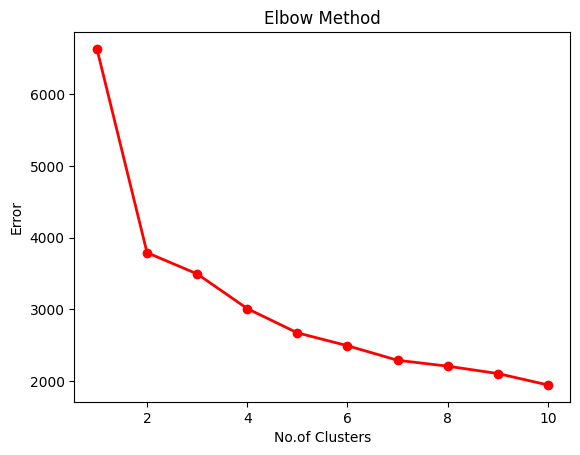

In [20]:
x = df_without_class.values

error = []

for k in range(1, 11):
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(x)
  error.append(model.inertia_)

plt.plot(range(1, 11), error, color='r', marker='o', linewidth=2)
plt.title('Elbow Method')
plt.xlabel('No.of Clusters')
plt.ylabel('Error')
plt.show()

In [21]:
model_pca = PCA(n_components=2, random_state=42)

x_pca = model_pca.fit_transform(x)

x_pca_df = pd.DataFrame(x_pca, columns=[f'PCA {i}' for i in range(1, 3)])

x_pca_df.head()

,PCA 1,PCA 2
0,-0.187938,-0.250017
1,1.678168,2.492499
2,-2.082244,1.041983
3,1.807566,1.438034
4,2.852237,0.514358


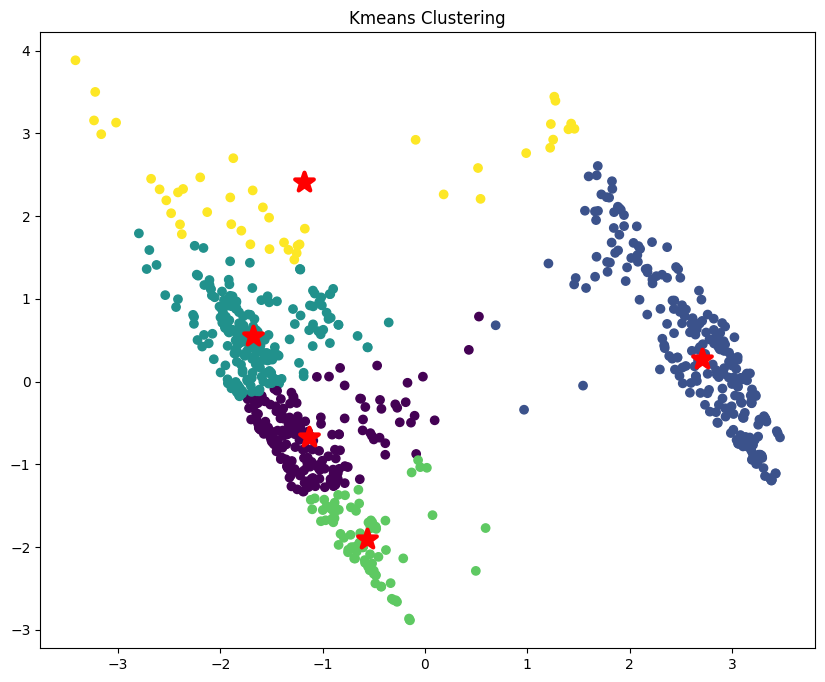

In [22]:
model_kmeans = KMeans(n_clusters=5, random_state=42)

model_kmeans.fit(x_pca)

labels = model_kmeans.labels_

df['cluster'] = labels

plt.figure(figsize=(10, 8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(model_kmeans.cluster_centers_[:, 0], model_kmeans.cluster_centers_[:, 1], marker='*', color='r', linewidth=3, s=200)
plt.title('Kmeans Clustering')
plt.show()

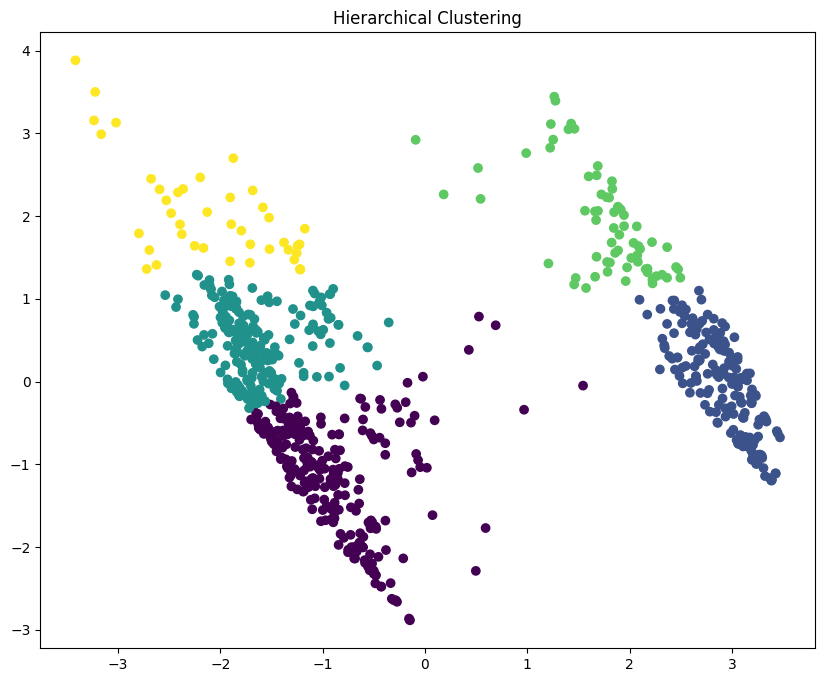

In [23]:
model_hierarchical = AgglomerativeClustering(n_clusters=5)

model_hierarchical.fit(x_pca)

labels = model_hierarchical.labels_

plt.figure(figsize=(10, 8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.show()

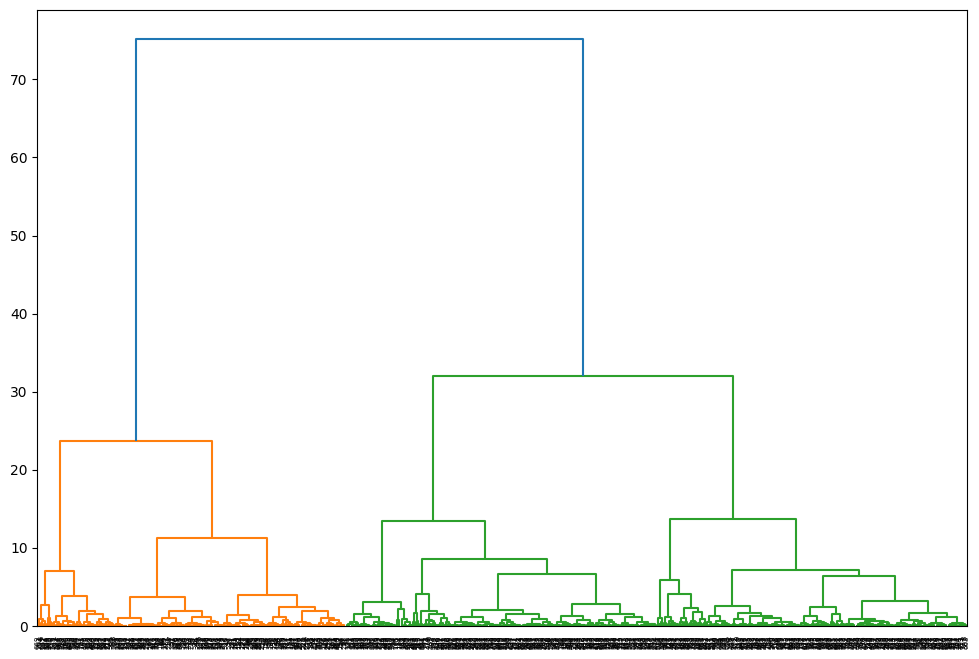

In [24]:
linked = linkage(x_pca, 'ward')

plt.figure(figsize=(12, 8))
dendrogram(linked)
plt.show()

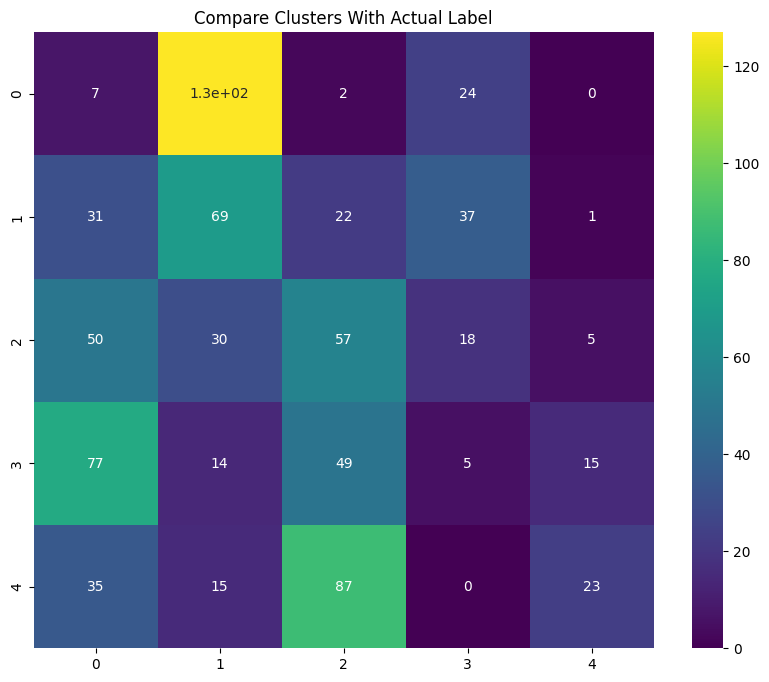


R2 Score: -0.6781250000000001


In [25]:
cm = confusion_matrix(df['num'], df['cluster'])

plt.figure(figsize=(10, 8))
sns.heatmap(cm, cmap='viridis', annot=True)
plt.title('Compare Clusters With Actual Label')
plt.show()

print(f'\nR2 Score: {r2_score(df['num'].values, df['cluster'].values)}')